**Supervised - Salary Prediction - Regression**

In [1]:
# import all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### import dataset

In [3]:
# read the dataset using pandas
data = pd.read_csv('/content/student_scores.csv')

In [4]:
# This displays the top 7 rows of the data
data.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


### Exploratory Data Analysis

In [5]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# this describes the basic stat behind the dataset used
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

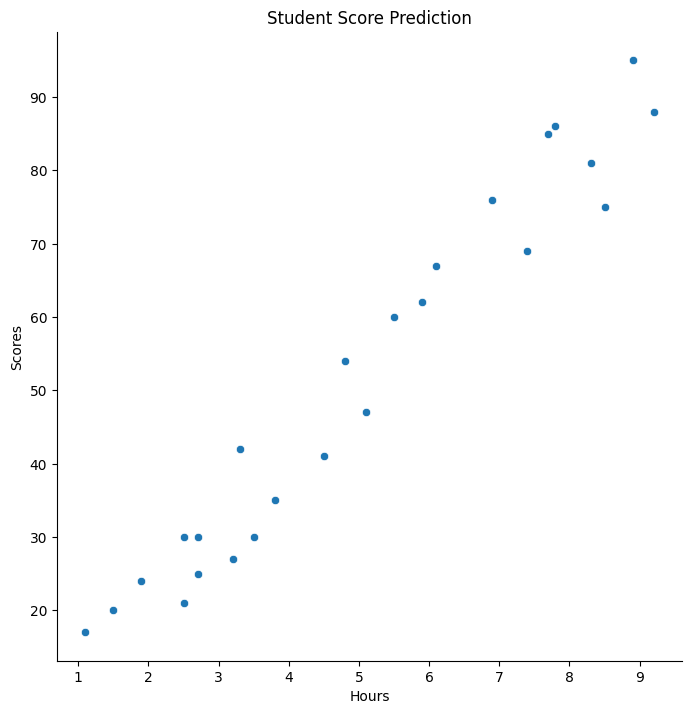

In [7]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Student Score Prediction')
plt.show()

### Feature Engineering
1. Check Duplicated Data
2. Check Missing Value Handling
3. Outlier Analysis
4. Encoding categorical : change string (categorical) into numerical -> in this dataset, there are no categorical data.

### Investigate of Feature Engineering

In [8]:
df = data.copy()

In [9]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [10]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [11]:
df = df.drop_duplicates()

In [12]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


In [ ]:
#Check missing value
df.isna().sum()

,0
YearsExperience,0
Salary,0


### There is no missing value

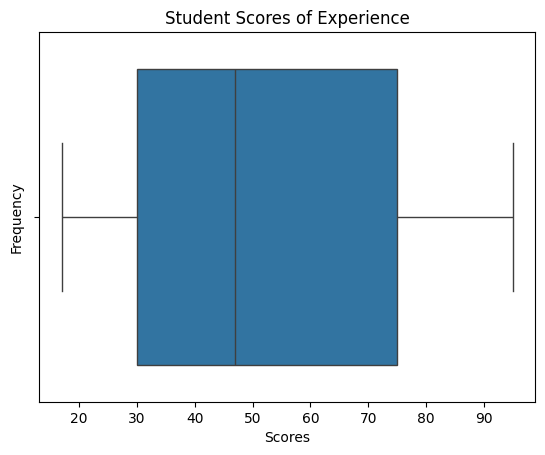

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Scores", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Scores")
plt.ylabel("Frequency")  # Anda bisa menggunakan "Hours" atau "Scores"
plt.title("Student Scores of Experience")

# Menampilkan plot
plt.show()

### There's no outlier value
### There are no problems in investigate Feature Engineering, next we are doing machine learning modelling and splitting data into X_train, X_test -> Predictor, y_train, y_test -> target variables. If there are problems in investigate feature engineering then doing splitting data and process feature engineering handling.

### Splitting the data

In [19]:
# Experience of Scores data
X = data['Scores']
X.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [20]:
# Hours data
y = data['Hours']
y.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [21]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [22]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

**Linear Regression**

In [23]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [24]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [25]:
#array
X_train

array([[47],
       [35],
       [20],
       [27],
       [41],
       [95],
       [75],
       [30],
       [30],
       [24],
       [54],
       [67],
       [86],
       [60],
       [85],
       [17],
       [69],
       [88]])

In [26]:
#array
X_test

array([[81],
       [30],
       [21],
       [76],
       [62],
       [25],
       [42]])

In [27]:
y_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [28]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [29]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([4.61185456, 3.43647557, 1.96725183, 2.65288957, 4.02416506,
       9.31337053, 7.35440554, 2.94673432, 2.94673432, 2.35904482,
       5.2974923 , 6.57081955, 8.43183628, 5.8851818 , 8.33388803,
       1.67340708, 6.76671604, 8.62773278])

In [30]:
y_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [31]:
# Predicting the Scores for the Test values
y_pred = lr_model.predict(X_test)

In [32]:
X_test

array([[81],
       [30],
       [21],
       [76],
       [62],
       [25],
       [42]])

In [33]:
y_pred

array([7.94209504, 2.94673432, 2.06520008, 7.45235379, 6.0810783 ,
       2.45699307, 4.12211331])

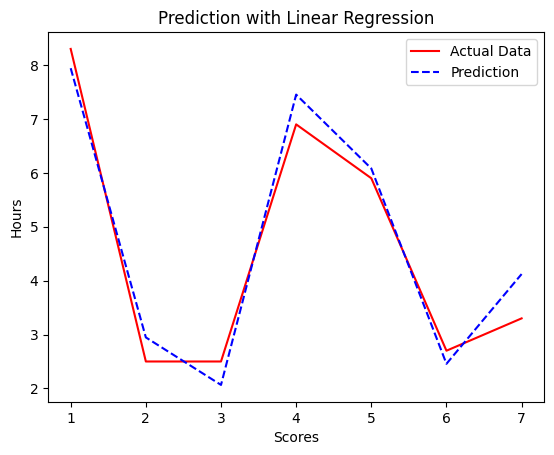

In [35]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [36]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [37]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [38]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9543089828375636


In [39]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 0.008286841092727926
Coefficient of the line Linear Regression: [0.09794825]


![](http://)Then it is said to form a line with result in Linear Regression
# y = 25478.12 + 9731.016 x
with x is the value of year experience work

**Decision Tree Regressor**
Using another Machine Learning Model :
1. Decision Tree
2. Random Forest

In [40]:
from sklearn.tree import DecisionTreeRegressor #

In [41]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [42]:
# Predicting the Scores for the Test values
y_pred_dt = dt_model.predict(X_test) #

In [43]:
y_pred_dt

array([7.7, 3.1, 1.5, 8.5, 5.5, 1.9, 4.5])

In [44]:
y_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


In [50]:
X_test

array([[81],
       [30],
       [21],
       [76],
       [62],
       [25],
       [42]])

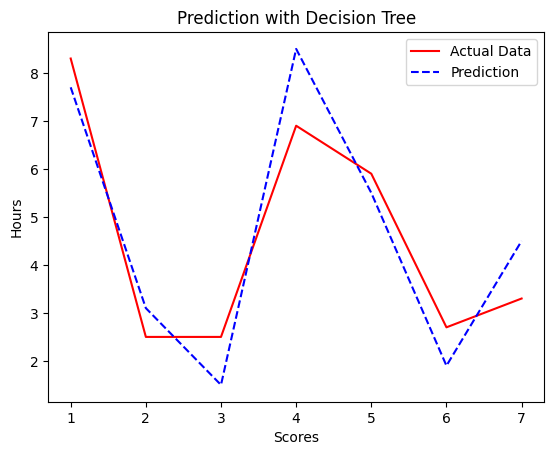

In [46]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('Hours')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [47]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [48]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8125821287779238


### Using Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
from sklearn.metrics import r2_score

you can doing modelling using RandomForest Regressor with the same flow like Decision Tree or LinearRegression above :)

In [53]:
# Splitting the data into features and labels
X = data[['Hours']]  # Features (Independent variable)
y = data['Scores']   # Labels (Dependent variable)

In [54]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [55]:
# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [56]:
# Train the model
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [57]:
# Predicting the scores for the test data
y_pred_rf = model_rf.predict(X_test)

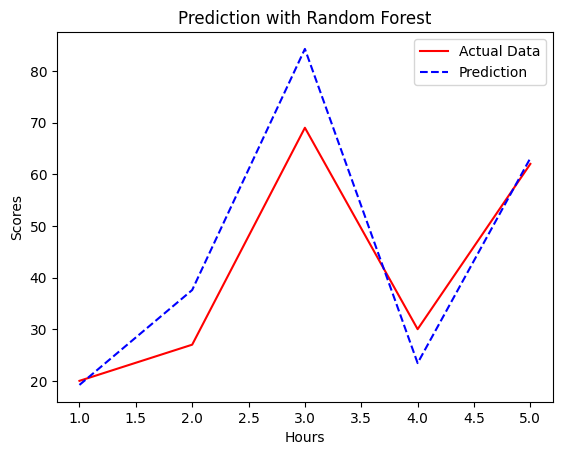

In [58]:
# Plotting the actual and predicted values
c = [i for i in range(1, len(y_test)+1, 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred_rf, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [59]:
# Calculate R square value
rsq_rf = r2_score(y_test, y_pred_rf)
print('R square Random Forest Results:', rsq_rf)

R square Random Forest Results: 0.8032653018232496


Perbandingan Evaluasi Metode

In [61]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [62]:
# --- Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rsq_lr = r2_score(y_test, y_pred_lr)


In [63]:
# --- Decision Tree ---
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rsq_dt = r2_score(y_test, y_pred_dt)

In [64]:
# --- Random Forest ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rsq_rf = r2_score(y_test, y_pred_rf)

Plotting the Comparison

In [65]:
# Create a list of model names and their corresponding R-squared values
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r_squared = [rsq_lr, rsq_dt, rsq_rf]

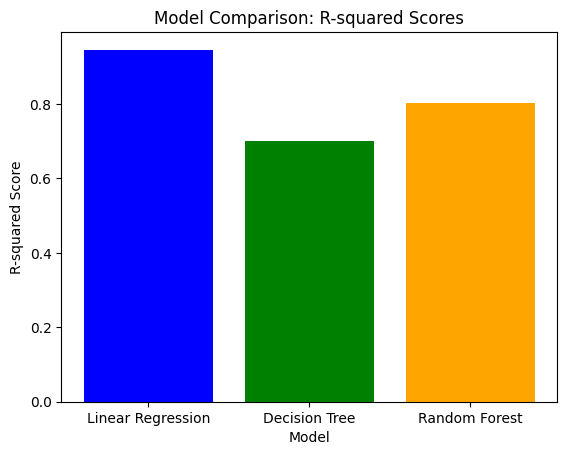

In [70]:
# Plotting the bar chart
plt.bar(models, r_squared, color=['blue', 'green', 'orange'])
# Add title and labels
plt.title('Model Comparison: R-squared Scores')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
#Display the plot
plt.show()